<a href="https://colab.research.google.com/github/Magnus-Wangari/Machine-learning-algorithms/blob/master/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import pandas as pd
from numpy import array
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder



In [4]:
from google.colab import files
uploades = files.upload()

Saving train_data.csv to train_data.csv


In [0]:
data=pd.read_csv('train_data.csv')
data.head(50)

In [82]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#counting null columns
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()



LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [89]:
#new_data=data.drop(['PoolQC'], axis = 1) 
data["PoolQC"].fillna("No pool", inplace = True) 
data["MiscFeature"].fillna("No feature", inplace = True)  
data["Fence"].fillna("No Fence", inplace = True) 
data["Alley"].fillna("No Alley", inplace = True) 
data["FireplaceQu"].fillna("No rating", inplace = True) 
data["GarageType"].fillna("No garage", inplace = True) 
data["GarageFinish"].fillna("No garage", inplace = True)
data["GarageQual"].fillna("No garage", inplace = True)
data["GarageCond"].fillna("No garage", inplace = True)
data["GarageCond"].fillna("No garage", inplace = True)
data["MasVnrType"].fillna("No veneer", inplace = True)
data["MasVnrType"].fillna("No veneer", inplace = True)
data["BsmtQual"].fillna("No basement", inplace = True)
data["BsmtFinType1"].fillna("No basement", inplace = True)
data["BsmtCond"].fillna("No basement", inplace = True)
data["BsmtExposure"].fillna("No basement", inplace = True)
data["BsmtFinType2"].fillna("No basement", inplace = True)
data["GarageYrBlt"].fillna("No garage", inplace = True)
data['MasVnrArea'].mean(skipna=True)
data["MasVnrArea"].fillna(mean, inplace = True)
data["Electrical"].fillna("SBrkr", inplace = True)
data['LotFrontage'].mean(skipna =True)
data["LotFrontage"].fillna(mean, inplace = True)
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [98]:
nominal=['MiscFeature','MSZoning','Street','LotShape','LotConfig','Heating','Electrical']
ordinal=['SaleCondition','SaleType','Fence','PoolQC','Alley','LandContour','Utilities','LandSlope','Neighborhood','Condition1','Condition2','HouseStyle','BldgType','OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']
numerical=['YrSold','MoSold','MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','EnclosedPorch','OpenPorchSF','WoodDeckSF''MSSubClass','LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','Bedroom','Kitchen','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea']
target=['SalePrice']


categorical_data=data.select_dtypes(include=['object']).copy()
column_names=(categorical_data.columns)
categorical_data.head()
for feature in column_names:
  categorical_data[feature]=categorical_data[feature].astype('category')
for feature in ordinal:
  categorical_data[feature]=categorical_data[feature].cat.codes

categorical_data.head() 

KeyError: ignored

In [104]:
data_copy=categorical_data.copy()

data_copy = pd.concat([pd.get_dummies(data_copy[nominal]),data_copy],axis=1) 
data_copy.drop(nominal,axis=1,inplace=True)
#data_copy
new_data = pd.concat([data_copy,data[numerical],data[target]],axis=1)
new_data

KeyError: ignored

In [103]:
all_features= list(new_data.columns)
#all_features
X = new_data.loc[:,all_features].values# slicing
y = new_data.loc[:,['SalePrice']].values
#y
X

array([[1, 60, 'RL', ..., 'WD', 'Normal', 208500],
       [2, 20, 'RL', ..., 'WD', 'Normal', 181500],
       [3, 60, 'RL', ..., 'WD', 'Normal', 223500],
       ...,
       [1458, 70, 'RL', ..., 'WD', 'Normal', 266500],
       [1459, 20, 'RL', ..., 'WD', 'Normal', 142125],
       [1460, 20, 'RL', ..., 'WD', 'Normal', 147500]], dtype=object)

In [102]:
#standardizing
X = StandardScaler().fit_transform(X)
X 


ValueError: ignored

In [99]:
pca = PCA(.90)
#pca= PCA(n_components=2)
pc_s = pca.fit_transform(X)
pca_data = pd.DataFrame(pc_s,columns=['PC1','PC2'])
final_data = pd.concat([pca_data,data[target]],axis = 1)
final_data



NameError: ignored

In [0]:
 final_data_array = final_data.to_numpy()

In [0]:
pca.explained_variance_

In [0]:
min_val = np.min(final_data_array, axis= 0)
max_val = np.max(final_data_array, axis= 0)
X,Y = np.meshgrid(np.linspace(min_val[0], 20), np.linspace(min_val[1], max_val[1], 20))

In [0]:
regressor = LassoCV()
final_train = np.c_[final_data_array[:,0],final_data_array[:,1]]
regressor.fit(final_train, final_data_array[:,2])
w_1 = regressor.coef_[0]
w_2 = regressor.coef_[1]
b = regressor.intercept_
Z = w_1*X + w_2* +b
#Z

Text(0.5, 0.92, 'Plane of best fit')

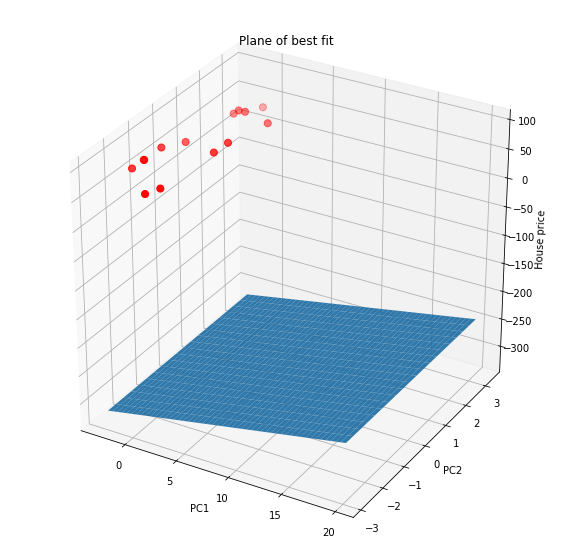

In [0]:
fig1 = plt.figure(figsize=(10,10))
ax = fig1.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride = 1, cstride=1,alpha = 0.9)
ax.scatter(final_data_array[:,0], final_data_array[:,1], final_data_array[:,2], c = 'r',s =50)
plt.xlabel('PC1')
plt.ylabel('PC2')
ax.set_zlabel('SalePrice')
ax.set_title('Plane of best fit')